In [23]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns

from fbprophet import Prophet # forecasting package developed at FB
from fbprophet.diagnostics import cross_validation, performance_metrics # Metrics to evaluate forecast
from fbprophet.plot import plot_cross_validation_metric # plot croosvalidation metric of prophet

import warnings
warnings.filterwarnings('ignore')

%matplotlib inline

In [24]:
data=pd.read_csv('/content/drive/MyDrive/csv files/construction_material_prices_2008_2018.csv', parse_dates=['Unnamed: 0'], dayfirst=True)
data.tail(50)

,Unnamed: 0,price_steel,price_rebar,price_glass,price_concrete,price_plywood
2895,2018-04-10,NaN,38.00,NaN,NaN,10.833333
2896,2018-04-11,NaN,34.00,NaN,NaN,10.833333
2897,2018-04-12,NaN,31.50,NaN,NaN,10.625000
2898,2018-04-13,NaN,31.00,NaN,NaN,10.625000
2899,2018-04-16,NaN,31.00,NaN,NaN,11.500000
2900,2018-04-17,NaN,17.50,NaN,NaN,11.166667
2901,2018-04-18,12.250000,17.50,NaN,NaN,11.500000
2902,2018-04-19,12.250000,16.50,NaN,NaN,11.500000
2903,2018-04-20,12.250000,22.25,NaN,NaN,12.666667
2904,2018-04-23,13.750000,20.50,NaN,NaN,14.666667


In [25]:
# finding null values
data.isnull().sum()

Unnamed: 0           0
price_steel        636
price_rebar       1296
price_glass       1473
price_concrete    1498
price_plywood      272
dtype: int64

In [26]:
# finding the data types of the instances
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2945 entries, 0 to 2944
Data columns (total 6 columns):
 #   Column          Non-Null Count  Dtype         
---  ------          --------------  -----         
 0   Unnamed: 0      2945 non-null   datetime64[ns]
 1   price_steel     2309 non-null   float64       
 2   price_rebar     1649 non-null   float64       
 3   price_glass     1472 non-null   float64       
 4   price_concrete  1447 non-null   float64       
 5   price_plywood   2673 non-null   float64       
dtypes: datetime64[ns](1), float64(5)
memory usage: 138.2 KB


In [27]:
# renaming first column as date
data.rename(columns={'Unnamed: 0':'date'}, inplace=True)

data.columns

Index(['date', 'price_steel', 'price_rebar', 'price_glass', 'price_concrete',
       'price_plywood'],
      dtype='object')

In [28]:
# creating dataframe for each material and treat each material separate

# plot the features against date
features = data.drop('date', axis=1)
date = data.date

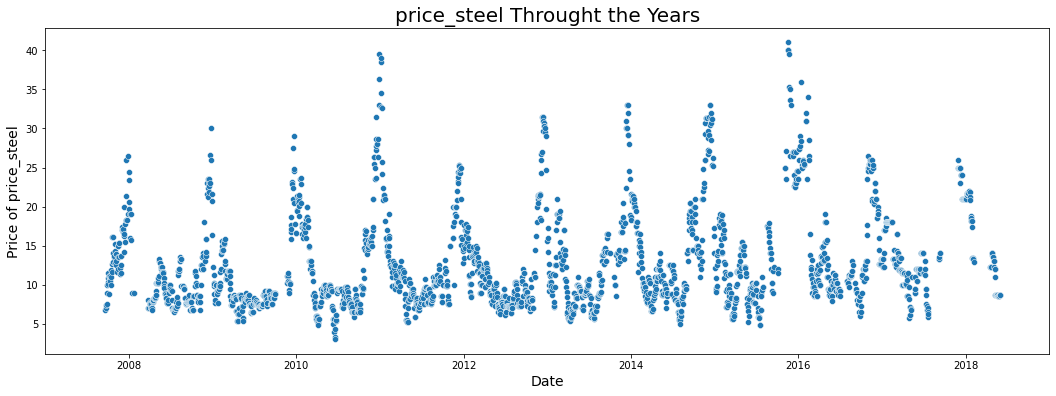

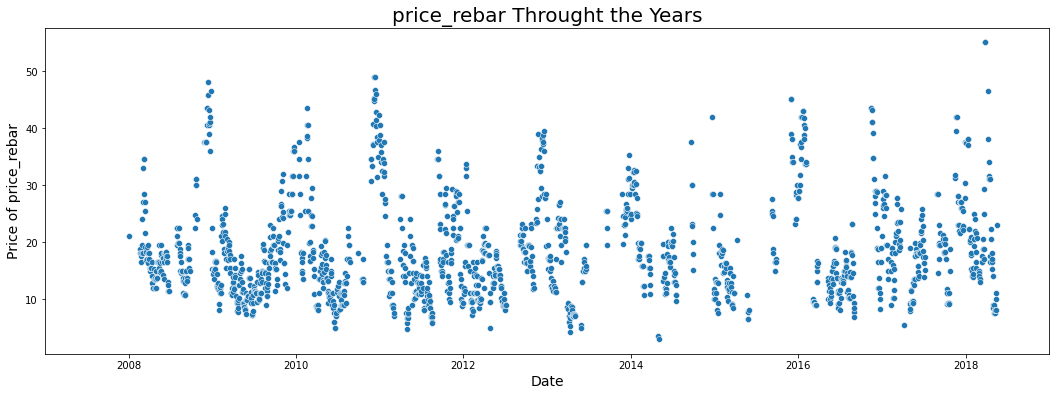

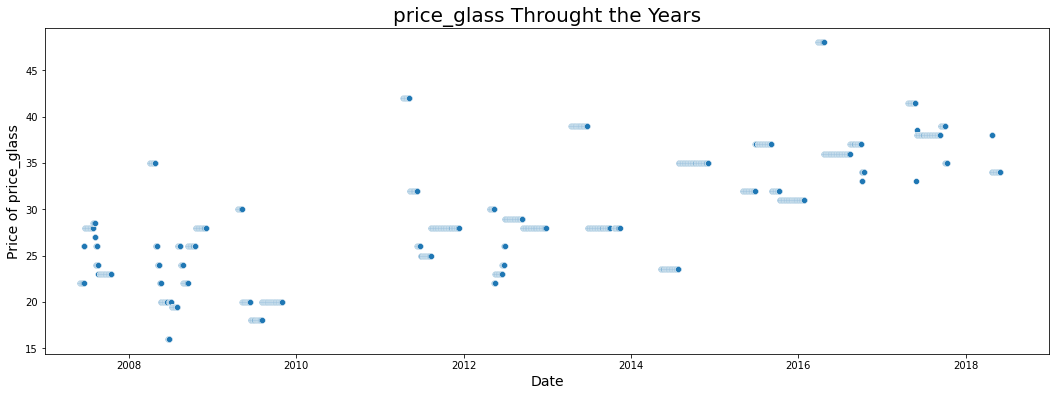

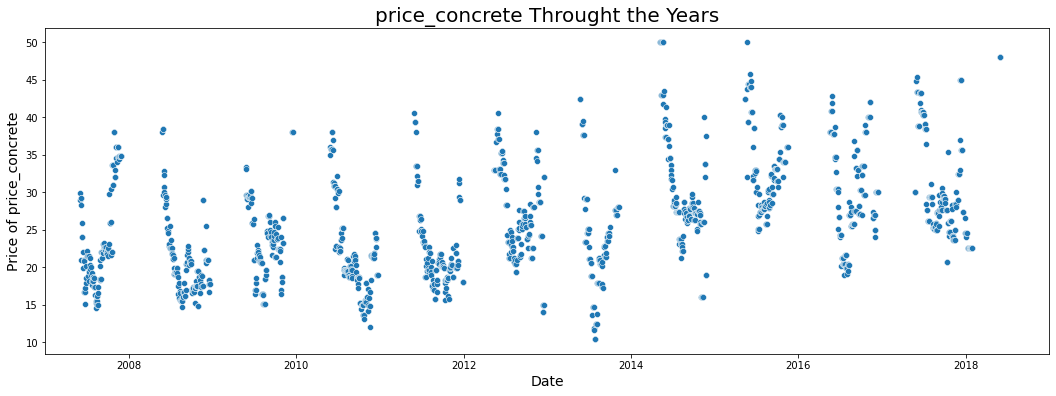

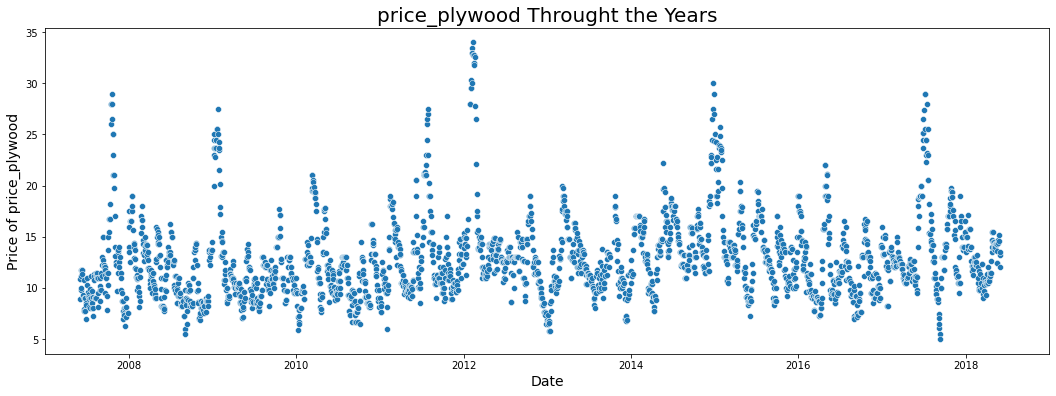

In [29]:
for col in features.columns:
    p=plt.figure(figsize=(18,6))
    
    p = sns.scatterplot(x=date, y=features[col], marker='o')
    
    plt.xlabel('Date', fontsize=14)
    plt.ylabel('Price of '+col, fontsize=14)
    plt.title(col+' Throught the Years', fontsize=20)
    p.set_xlim(pd.Timestamp('2007-01-01'), pd.Timestamp('2019-01-01'))
    
    plt.show(p)

Data shows some seasonality. Although in the case of glass, data is very scatter. So I think because of the potential seasonality prophet may be a good package to forecast pricing

In [30]:
# creating a dataframe for each material with date
data_steel = data[['date', 'price_steel']]
data_rebar = data[['date', 'price_rebar']]
data_glass = data[['date', 'price_glass']]
data_concrete = data[['date', 'price_concrete']]
data_plywood = data[['date', 'price_plywood']]

In [31]:
print(data_steel.shape)
print(data_rebar.shape)
print(data_glass.shape)
print(data_concrete.shape)
print(data_plywood.shape)

(2945, 2)
(2945, 2)
(2945, 2)
(2945, 2)
(2945, 2)



**Data preprocesing:**
For modeling I will first log transform the data. This helps convert non stationary data into stationary
To plot the data 
I will inverse log transform the data so that the plots show meaningful numbers. 
I will also plot inverse log transform metrics so that they show meaningful values

In [32]:
data_steel.columns=['ds','y']
data_steel['y_orig'] = data_steel.y #keeping original data in df
data_steel.y = np.log(data_steel.y) #log transform data
data_steel = data_steel.dropna()
data_steel.tail()

,ds,y,y_orig
2927,2018-05-24,2.140066,8.50
2928,2018-05-25,2.140066,8.50
2929,2018-05-29,2.169054,8.75
2930,2018-05-30,2.169054,8.75
2931,2018-05-31,2.169054,8.75


In [33]:
# Making the Prophet model and I am fitting it.
steel_model = Prophet()
steel_model.fit(data_steel)

INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


In [34]:
# I am making a future data frame. I am interested in forecasting 6 months = 182.5 days
# This will create a df with size months worth of dates.
steel_future = steel_model.make_future_dataframe(periods=183)
steel_future.tail()

,ds
2487,2018-11-26
2488,2018-11-27
2489,2018-11-28
2490,2018-11-29
2491,2018-11-30


In [35]:
# predicting values for those six months
steel_forecast = steel_model.predict(steel_future)
steel_forecast_orig = steel_forecast #create a copy  of prediction df

# inverse log transform the predictions
steel_forecast_orig[['yhat', 'yhat_lower', 'yhat_upper']] = np.exp(steel_forecast_orig[['yhat', 'yhat_lower', 'yhat_upper']])
steel_forecast_orig[['ds', 'yhat', 'yhat_lower', 'yhat_upper']].tail()

,ds,yhat,yhat_lower,yhat_upper
2487,2018-11-26,21.252067,15.093180,28.562459
2488,2018-11-27,21.622099,15.867583,30.035681
2489,2018-11-28,21.688645,15.596515,29.661690
2490,2018-11-29,21.640765,16.067170,29.851656
2491,2018-11-30,21.549945,15.757387,29.902866


Text(0.5, 1.0, 'Forecast of Steel Price')

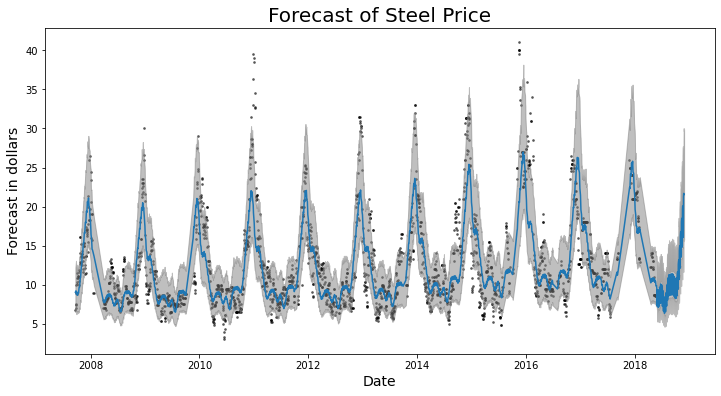

In [37]:
# plotting predictions and historic data
plt.figure(figsize=(12,6))
plt.plot(steel_forecast_orig.ds, steel_forecast_orig.yhat)
plt.scatter(data_steel.ds, data_steel.y_orig, color='k', alpha=0.5, s=3)

# plotting upper/lower bounds
plt.fill_between(steel_forecast_orig.ds, steel_forecast_orig.yhat_lower,steel_forecast_orig.yhat_upper,
                 color='gray', alpha=0.5)

plt.xlabel('Date', fontsize=14)
plt.ylabel('Forecast in dollars', fontsize=14)
plt.title('Forecast of Steel Price', fontsize=20)

(736695.0, 737119.0)

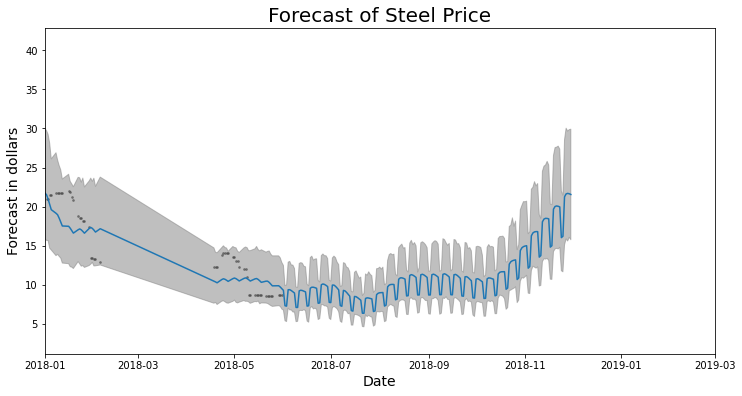

In [38]:
# Doing a closeup in prediction to see distribution of forescated value and using this to make recommendations.
plt.figure(figsize=(12,6))
plt.plot(steel_forecast_orig.ds, steel_forecast_orig.yhat)
plt.scatter(data_steel.ds, data_steel.y_orig, color='k', alpha=0.5, s=3)

# plotting upper/lower bounds
plt.fill_between(steel_forecast_orig.ds, steel_forecast_orig.yhat_lower,steel_forecast_orig.yhat_upper,
                 color='gray', alpha=0.5)

plt.xlabel('Date', fontsize=14)
plt.ylabel('Forecast in dollars', fontsize=14)
plt.title('Forecast of Steel Price', fontsize=20)
plt.xlim(pd.Timestamp('2018-01-01'), pd.Timestamp('2019-03-01'))